In [2]:
import pandas as pd
import numpy as np

# Loads in ./data/cohere_2ndbrain_embeddings.csv and ./data/cohere_memory_embeddings.csv

# in form: filename,index,chunk_text,embedding,links
brain_df = pd.read_csv('./data/cohere_2ndbrain_embeddings.csv')
memory_df = pd.read_csv('./data/cohere_memory_embeddings.csv')

memory_embeddings = memory_df['embedding'].apply(lambda x: eval(x))
brain_embeddings = brain_df['embedding'].apply(lambda x: eval(x))

memory_embeddings = np.array([np.array(x) for x in memory_embeddings])
brain_embeddings = np.array([np.array(x) for x in brain_embeddings])

In [3]:
# Writes the dataframes to new csv files in ./sample_data with the text removed, so there is only filename, index, embedding, and links 
brain_df.drop(columns=['chunk_text']).to_csv('./sample_data/cohere_2ndbrain_embeddings.csv', index=False)
memory_df.drop(columns=['chunk_text']).to_csv('./sample_data/cohere_memory_embeddings.csv', index=False)

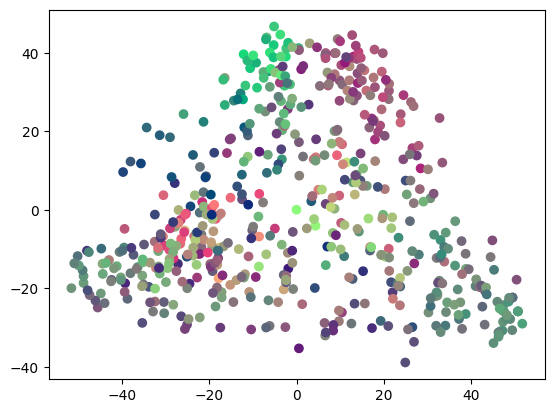

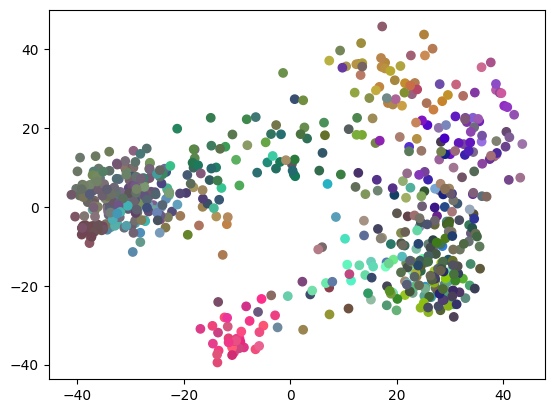

In [31]:
# Runs PCA on memory embeddings and plots them as x, y, r, g, b (4096 dim -> 5 dim), converts color to 0-1 for matplotlib
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=5)
pca.fit(memory_embeddings)
memory_embeddings_pca = pca.transform(memory_embeddings)

# Normalize color values (2:5) to 0-1 using min-max normalization
memory_embeddings_pca[:, 2:5] = (memory_embeddings_pca[:, 2:5] - memory_embeddings_pca[:, 2:5].min()) / (memory_embeddings_pca[:, 2:5].max() - memory_embeddings_pca[:, 2:5].min())

# Plot memory embeddings
plt.scatter(memory_embeddings_pca[:, 0], memory_embeddings_pca[:, 1], c=memory_embeddings_pca[:, 2:5])
plt.show()

# now for brain embeddings
pca = PCA(n_components=5)
pca.fit(brain_embeddings)

brain_embeddings_pca = pca.transform(brain_embeddings)
brain_embeddings_pca[:, 2:5] = (brain_embeddings_pca[:, 2:5] - brain_embeddings_pca[:, 2:5].min()) / (brain_embeddings_pca[:, 2:5].max() - brain_embeddings_pca[:, 2:5].min())

plt.scatter(brain_embeddings_pca[:, 0], brain_embeddings_pca[:, 1], c=brain_embeddings_pca[:, 2:5])
plt.show()


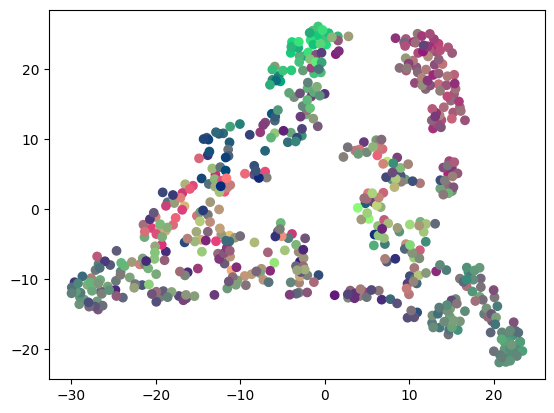

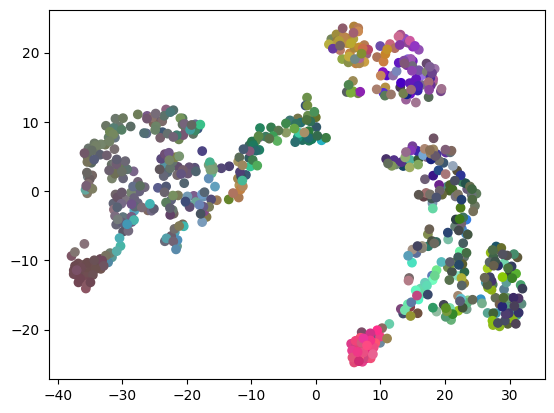

In [32]:
# Now for t-SNE
from sklearn.manifold import TSNE

# Runs t-SNE on embeddings to get new XY, then uses PCA RGB already calculated
tsne = TSNE(n_components=2)
tsne.fit(memory_embeddings)
memory_embeddings_tsne = tsne.fit_transform(memory_embeddings)

plt.scatter(memory_embeddings_tsne[:, 0], memory_embeddings_tsne[:, 1], c=memory_embeddings_pca[:, 2:5])
plt.show()

tsne = TSNE(n_components=2)
tsne.fit(brain_embeddings)
brain_embeddings_tsne = tsne.fit_transform(brain_embeddings)

plt.scatter(brain_embeddings_tsne[:, 0], brain_embeddings_tsne[:, 1], c=brain_embeddings_pca[:, 2:5])
plt.show()

# UMAP + UMAP Colors 

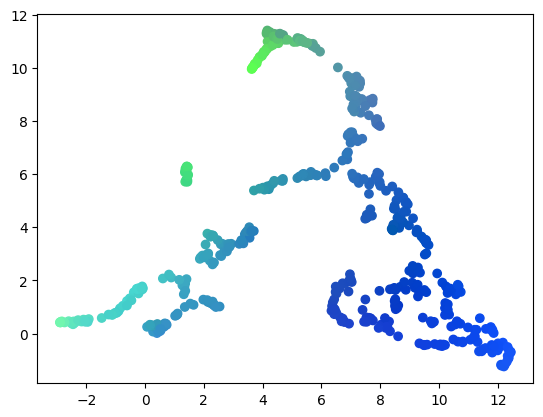

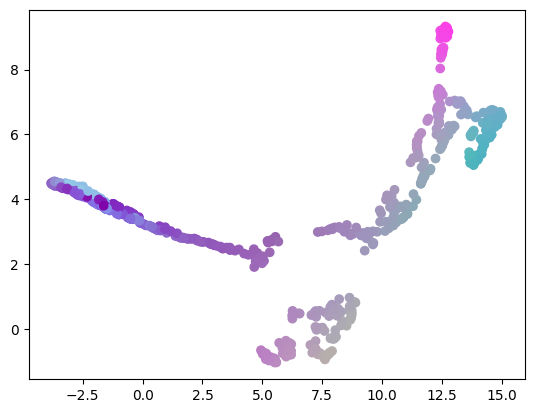

In [34]:
import umap

# UMAP with 5 components
reducer = umap.UMAP(n_components=5)
memory_embeddings_umap = reducer.fit_transform(memory_embeddings)

# Normalize color values (2:5) to 0-1 using min-max normalization
memory_embeddings_umap[:, 2:5] = (memory_embeddings_umap[:, 2:5] - memory_embeddings_umap[:, 2:5].min()) / (memory_embeddings_umap[:, 2:5].max() - memory_embeddings_umap[:, 2:5].min())

# Plot memory embeddings with UMAP
plt.scatter(memory_embeddings_umap[:, 0], memory_embeddings_umap[:, 1], c=memory_embeddings_umap[:, 2:5])
plt.show()

brain_embeddings_umap = reducer.fit_transform(brain_embeddings)

# Normalize color values (2:5) to 0-1 using min-max normalization
brain_embeddings_umap[:, 2:5] = (brain_embeddings_umap[:, 2:5] - brain_embeddings_umap[:, 2:5].min()) / (brain_embeddings_umap[:, 2:5].max() - brain_embeddings_umap[:, 2:5].min())

# Plot brain embeddings with UMAP
plt.scatter(brain_embeddings_umap[:, 0], brain_embeddings_umap[:, 1], c=brain_embeddings_umap[:, 2:5])
plt.show()


# UMAP + PCA Colors (5 dim, last 3)

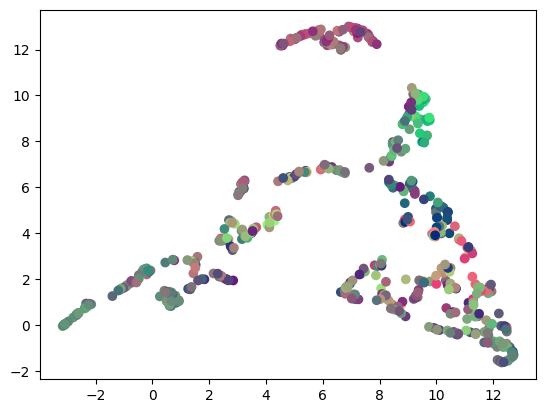

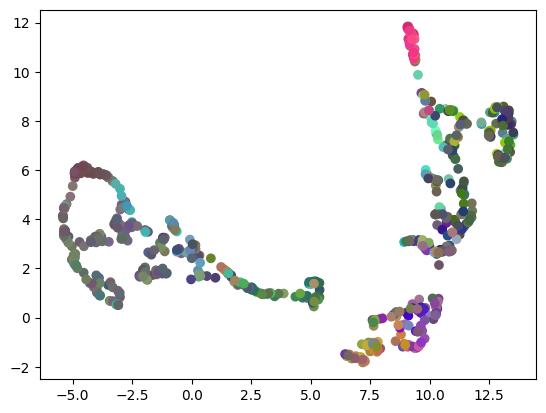

In [37]:
plt.scatter(memory_embeddings_umap[:, 0], memory_embeddings_umap[:, 1], c=memory_embeddings[:, 2:5])
plt.show()

plt.scatter(brain_embeddings_umap[:, 0], brain_embeddings_umap[:, 1], c=brain_embeddings[:, 2:5])
plt.show()


# UMAP + new PCA Colors (3 dim)

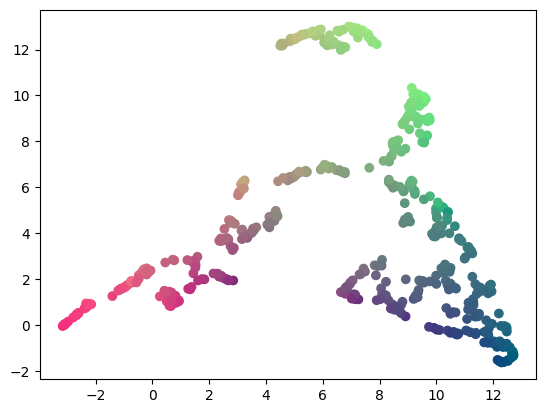

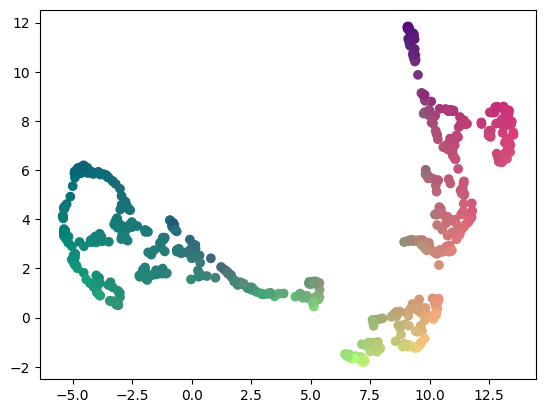

In [38]:
# Runs PCA on memory embeddings and plots them as x, y, r, g, b (4096 dim -> 5 dim), converts color to 0-1 for matplotlib
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=3)
memory_embeddings_pca3 = pca.fit_transform(memory_embeddings)

# Normalize color values (2:5) to 0-1 using min-max normalization
memory_embeddings_pca3 = (memory_embeddings_pca3 - memory_embeddings_pca3.min()) / (memory_embeddings_pca3.max() - memory_embeddings_pca3.min())

# Plot memory embeddings with UMAP x, y 
plt.scatter(memory_embeddings_umap[:, 0], memory_embeddings_umap[:, 1], c=memory_embeddings_pca3[:, 0:3])
plt.show()

pca = PCA(n_components=3)
brain_embeddings_pca3 = pca.fit_transform(brain_embeddings)

# Normalize color values (2:5) to 0-1 using min-max normalization
brain_embeddings_pca3 = (brain_embeddings_pca3 - brain_embeddings_pca3.min()) / (brain_embeddings_pca3.max() - brain_embeddings_pca3.min())

# Plot brain embeddings with UMAP x, y
plt.scatter(brain_embeddings_umap[:, 0], brain_embeddings_umap[:, 1], c=brain_embeddings_pca3[:, 0:3])
plt.show()

